<a href="https://colab.research.google.com/github/annisapraditha/tugasbesarML/blob/main/Tugas_3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive #buat loot drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/chest_ray2017.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [41]:
base_dir = '/tmp/chest_xray'

test_dir = os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')

test_NORMAL_dir = os.path.join(test_dir, 'NORMAL')
test_PNEUMONIA_dir = os.path.join(test_dir, 'PNEUMONIA')

train_NORMAL_dir = os.path.join(train_dir, 'NORMAL')
train_PNEUMONIA_dir = os.path.join(train_dir, 'PNEUMONIA')

In [42]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print(os.listdir(test_NORMAL_dir)[:5])
print(os.listdir(test_PNEUMONIA_dir)[:5])

['IM-0099-0001.jpeg', 'NORMAL2-IM-0141-0001.jpeg', 'NORMAL2-IM-0023-0001.jpeg', 'NORMAL2-IM-0273-0001.jpeg', 'NORMAL2-IM-0343-0001.jpeg']
['person149_bacteria_713.jpeg', 'person1_virus_8.jpeg', 'person1629_virus_2823.jpeg', 'person39_virus_85.jpeg', 'person139_bacteria_665.jpeg']


In [43]:
# Cek jumlah data train dan data validation
print('total test NORMAL images:', len(os.listdir(test_NORMAL_dir)))
print('total test PNEUMONIA images:', len(os.listdir(test_PNEUMONIA_dir)))
print('total training NORMAL images:', len(os.listdir(train_NORMAL_dir)))
print('total training PNEUMONIA images:', len(os.listdir(train_PNEUMONIA_dir)))

total test NORMAL images: 234
total test PNEUMONIA images: 390
total training NORMAL images: 1349
total training PNEUMONIA images: 3884


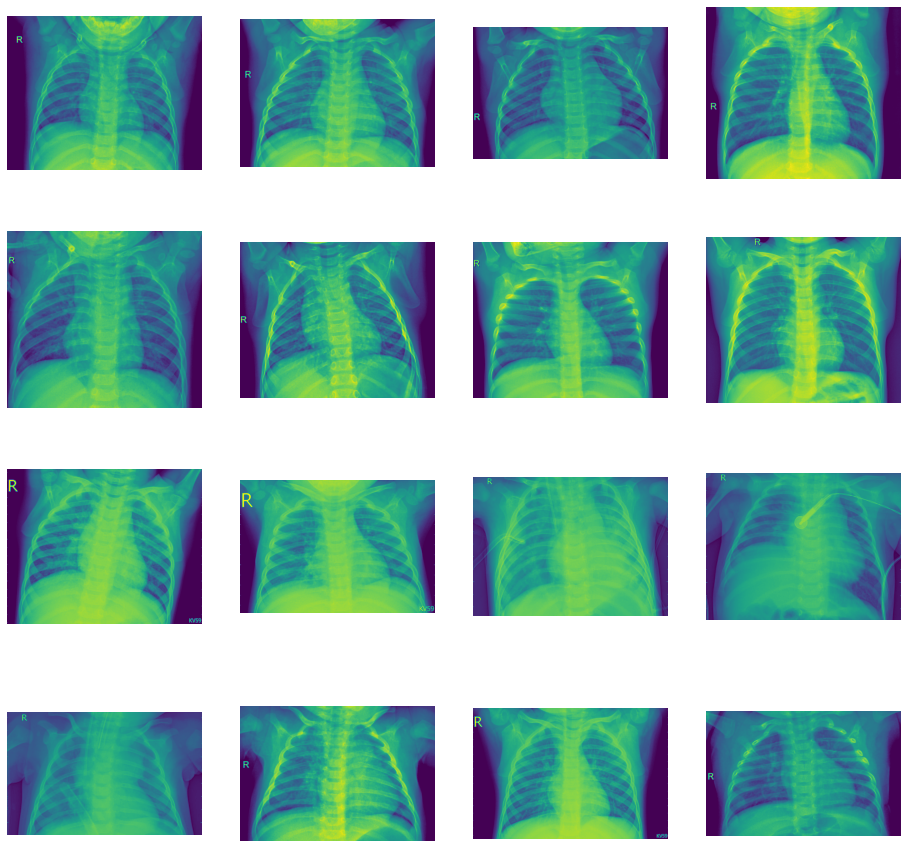

In [44]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_NORMAL_pix = [os.path.join(train_NORMAL_dir, fname) 
                for fname in os.listdir(train_NORMAL_dir)[pic_index-8:pic_index]]
next_PNEUMONIA_pix = [os.path.join(train_PNEUMONIA_dir, fname) 
                for fname in os.listdir(train_PNEUMONIA_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_NORMAL_pix+next_PNEUMONIA_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [45]:
import cv2
import numpy as np

# Gather data test
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [46]:
# Gather data validation
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [47]:
# Tampilkan shape dari data train dan data validation
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)

Test Data =  (624, 150, 150, 3)
Test Label =  (624,)
Train Data =  (5232, 150, 150, 3)
Train Label =  (5232,)


In [48]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", test_data[0][0][0])

x_test = test_data.astype('float32') / 255.0
x_train = train_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_test[0][0][0])

Data sebelum di-normalisasi  [48 48 48]
Data setelah di-normalisasi  [0.1882353 0.1882353 0.1882353]


In [49]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", test_label[100:110])

lb = LabelEncoder()
y_test = lb.fit_transform(test_label)
y_train = lb.fit_transform(train_label)

print("Label setelah di-encoder ", y_test[100:110])

Label sebelum di-encoder  ['PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA'
 'PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


In [50]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(64, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

# Tampilkan model summary
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4320064   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 4,320,129
Trainable params: 4,320,129
Non-trainable params: 0
_________________________________________________________________


In [51]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [55]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_test, y_test ))

Epoch 1/50
262/262 [==============================] - 2s 9ms/step - loss: 0.5752 - acc: 0.7232 - val_loss: 0.3791 - val_acc: 0.6250
Epoch 2/50
262/262 [==============================] - 2s 8ms/step - loss: 0.2876 - acc: 0.8286 - val_loss: 0.3975 - val_acc: 0.8542
Epoch 3/50
262/262 [==============================] - 2s 8ms/step - loss: 0.2515 - acc: 0.9320 - val_loss: 0.5326 - val_acc: 0.8029
Epoch 4/50
262/262 [==============================] - 2s 8ms/step - loss: 0.2232 - acc: 0.9425 - val_loss: 0.6933 - val_acc: 0.7676
Epoch 5/50
262/262 [==============================] - 2s 8ms/step - loss: 0.2211 - acc: 0.9365 - val_loss: 1.4072 - val_acc: 0.6843
Epoch 6/50
262/262 [==============================] - 2s 8ms/step - loss: 0.2071 - acc: 0.9400 - val_loss: 0.3599 - val_acc: 0.8654
Epoch 7/50
262/262 [==============================] - 2s 8ms/step - loss: 0.1814 - acc: 0.9492 - val_loss: 0.4568 - val_acc: 0.8397
Epoch 8/50
262/262 [==============================] - 2s 8ms/step - loss: 0.

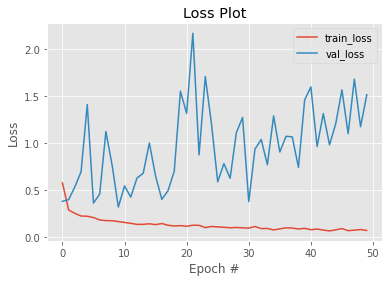

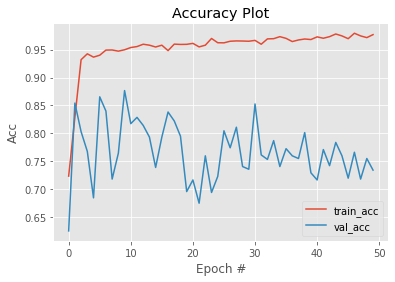

In [56]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.96      0.30      0.46       234
           1       0.70      0.99      0.82       390

    accuracy                           0.73       624
   macro avg       0.83      0.65      0.64       624
weighted avg       0.80      0.73      0.69       624

